In [ ]:
# установить свежую версию
!pip install scipy==1.5.2

     |████████████████████████████████| 25.9MB 164kB/s 
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
import math
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt 

#### Множественная линейная регрессия

Зависимая переменная $Y$, зависит от факторов $X = (X_1, ..., X_k)$

Множественная линейная модель

$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_k x_{ik} + \varepsilon$, $i = \overline {1,n}$, $n$ кол-во наблюдений.

$\beta_0, ..., \beta_k$ параметры модели

$E\varepsilon_i = 0$

$E\varepsilon_i = 0$

$K(\varepsilon_l, \varepsilon_u)$ = 0$ при $l \neq u$ ошибки независимы.

$D \varepsilon_i = \sigma^2_i$, дисперсии равны между собой $\sigma^2_i = \sigma^2_j = \sigma^2$, $\sigma^2$ нам неизвестно и так же является параметром модели.


Чтобы построить оценку множ. лин. регрессии, нам необходимо найти оценки параметров $\hat{\beta_0}, ..., \hat{\beta_k}$. 

Тогда мы построим оценку мн. лн. рег.

$\hat{y}(x) = \hat{\beta_0} + \hat{\beta_1}x_1 + ... + \hat{\beta_k}x_k$, где

$x = (x_1, ..., x_k)$ вектор значений фактора.

#### Матричный вид

$Y = A\beta + \varepsilon$, где

$Y = (y_1, ..., y_n)^T$ вектор наблюдений отклика

$\beta= (\beta_0, ..., \beta_k)^T$ вектор неизвестных параметров

$\varepsilon = (\varepsilon_1, ..., \varepsilon_n)^T$ вектор ошибок

$ A =  \begin{pmatrix}
              1 & x_{11} & x_{12} & ... & x_{1k} \\
              1 & x_{21} & x_{22} & ... & x_{2k} \\
              ... & ... & ... & ... & ... \\
              1 & x_{n1} & x_{n2} & ... & x_{nk}
            \end{pmatrix}^{n \times (k+1)} $

матрица порядка $n \times (k+1)$

Можно переписать матрицу $A$ как набор векторов

$A = (X_0, ..., X_k)$, где $X_0 = (1, 1, ..., 1)^T$, $X_1 = (x_{11}, x_{21}, ..., x_{n1})^T$ и т.д.

#### МНК-оценки

$(Y - A \beta)^T(Y - A \beta) = \sum \limits_{i=1}^n (y_i - \beta_0 - \beta_1 x_{i1} - ... - b_k x_{ik})^2 \rightarrow \underset{\beta}{min}$, где 

$Y$ наблюдаемые значения отклика

$A\beta$ предсказанные значения отклика

$(A^T A) \hat{\beta} = A^TY \Rightarrow \hat{\beta} = (A^T A)^{-1} A^T Y$

если матрица $A^T A$ обратима, т.е. существует обратная матрица $(A^T A)^{-1}$

Найдя оценки $\beta$, мы можем построить выборочную мн. лин. рег., которая является оценкой мн. лин. рег.

$\hat{y}(x) = \hat{\beta_0} + \hat{\beta_1}x_1 + ... + \hat{\beta_k}x_k$

$\hat{\varepsilon} = (e_1, ..., e_n): e_i = y_i - \hat{y}(x_i)$, где

$e_i$ остатки

$RSS = \sum \limits_{i=1}^n (y_i - \hat{y_i})^2$

$S^2 = \frac{RSS}{n-k-1} = \frac{ \sum \limits_{i=1}^n (y_i - \hat{y_i})^2}{n-k-1} = \frac{1}{\hat{\varepsilon}^T \hat{\varepsilon}} \sim \sigma^2$, где

$k$ - кол-во факторов, без учёта столбца с единицами.

$n-k-1$ т.к. у нас $k-1$ неизвестных факторов (иксов).

#### Свойства МНК-оценок

Несмещенные

$E\hat{\beta} = (A^TA)^{-1} A^T EY = (A^TA)^{-1} A^T A \beta = \beta$


Данные оценки **являются наилучшими** линейными несмещенными оценками, т.е. имеют наименьшую дисперсию среди всех оценок, которые являются линейными и несмещенными

$D \tilde \beta_i \leq D \hat{\beta_i} $

Дисперсию $D \hat{\beta}$ можно выразить через дисперсию ошибок наблюдений

$D \hat{\beta} = E( (\hat{\beta} - \beta) (\hat{\beta} - \beta)^T ) = \sigma^2 (A^TA)^{-1}$


#### Распределение оценок

Предположим, что $\varepsilon^T = (\varepsilon_1, ..., \varepsilon_n) \sim N(0, \sigma^2 E_n)$, где

$E_n$ ковариационная матрица, по диагонали которой стоят дисперсии $\sigma^2$, вне диагонали нули, т.е. в данном случе ошибки наблюдений независимы.

В этом случае, статистика

$\frac{(n - k - 1) S^2}{\sigma^2} \sim \chi^2_{n-k-1}$

$\hat{\beta} \sim N(\beta, \sigma^2 (A^T A )^{-1})$

Статистика $\frac{(n - k - 1) S^2}{\sigma^2} \sim \chi^2_{n-k-1}$ взаимно независима с ветором оценок $\hat{\beta}$

Случайная величина равная центрированой и нормированной величине $\hat{\beta_j}$

$\frac{\hat{\beta_j} - \beta_j}{S \sqrt{[(A^TA)^{-1}]_{(j+1)(j+1)}}} \sim T_{n-k-1}$, $j = \overline {0,k}$, где

$S = \sqrt{S^2}$ оценка дисперсии

$[(A^TA)^{-1}]_{(j+1)(j+1)}$ такая запись, говорит нам, что необходимо взять из $(j+1)$ строки и $(j+1)$ столбца элемент из матрицы.

например, нам нужно взять элемент из матрицы $[(A^TA)^{-1}]_{(j+1)(j+1)}$ участвующий при построении оценки $\hat{\beta_{j=2}}$, здесь $j=2$, значит нам нужно взять из $2+1$ строки и $2+1$ столбца элемент. 



Случайная величина равная центрированной и нормированой величине прогноза

$\frac{\hat{y}(x) - y(x)}{S \sqrt{x^T (A^TA)^{-1} x }} \sim T_{n-k-1}$, где

$x = (1, x_1, .., x_k)$

$S = \sqrt{S^2}$ оценка дисперсии

Используя данные законы распределения, мы можем построить доверительные интервалы.

#### Доверительные интервалы

$\beta_j$

$\hat{\beta_j} \pm t_{1 - \frac{\alpha}{2}, n-k-1} S \sqrt{[(A^TA)^{-1}]_{(j+1)(j+1)}}$

$[(A^TA)^{-1}]_{(j+1)(j+1)}$ такая запись, говорит нам, что необходимо взять из $(j+1)$ строки и $(j+1)$ столбца элемент из матрицы.

например, нам нужно взять элемент из матрицы $[(A^TA)^{-1}]_{(j+1)(j+1)}$ участвующий при построении оценки $\hat{\beta_{j=2}}$, здесь $j=2$, значит нам нужно взять из $2+1$ строки и $2+1$ столбца элемент. 

$y(x) = \beta_o + \beta_1x_1 + ... + \beta_kx_k$

$\hat{y}(x) \pm t_{1 - \frac{\alpha}{2}, n-k-1} S \sqrt{x^T (A^TA)^{-1} x}$

$\sigma^2$ дисперсия ошибок наблюдений $\varepsilon_i$

$\bigg ( \frac{ S^2 (n-k-1) }{ \chi^2_{1 - \frac{\alpha}{2} (n-k-1)}},  \frac{ S^2 (n-k-1) }{ \chi^2_{\frac{\alpha}{2}, (n-k-1) } }\bigg )$

#### Коэффициент детерминации

$F = \frac{R^2}{1 - R^2} \frac{n-k-1}{k} \sim F_{k, n-k-1}$, где

$F_{k, n-k-1}$ распределение Фишера.

Построение коэфициента детерминации.

Возьмем простую линейную регрессию с одним фактором $x$.

В качестве baseline модели, возьмем модель, которая для всех возможных значений $x$ говорит, что значение отклика будет равно выборочному среднему.

$\tilde y(x) = \overline Y$

данная модель имее величину остаточных сумм квадратов

$RSS = \sum \limits_{i=1}^n(y_i - \overline Y)^2$

Мы хотим построить модель, которая имеет наименьшее значение RSS, которое отличается от baseline значения.

Тогда в качестве меры качества модели, мы можем рассматривать отношение RSS построенной модели к RSS модели $\tilde y(x) = \overline Y$

$\frac{RSS}{\sum \limits_{i=1}^n(y_i - \overline Y)^2}$

чем значение меньше, тем лучше построенная модель.

На основе этой статистики, построим статистику, которая будет принимать большее значение, при большей точности модели

$1 - \frac{RSS}{\sum \limits_{i=1}^n(y_i - \overline Y)^2}$

чем больше значение, тем лучше построенная модель

После преобразования данной статистики, можно показать

$R^2 = K^2_{\hat{y}y} = \frac{ \bigg ( \sum \limits_{i=1}^n (y_i - \overline Y)(\hat{y_i} - \overline Y) \bigg )^2 }{\sum \limits_{i=1}^n (y_i - \overline Y)^2 \sum \limits_{i=1}^n (\hat{y_i} - \overline Y)^2} = 1 - \frac{RSS}{\sum \limits_{i=1}^n(y_i - \overline Y)^2}$

Выражение, это квадрат корреляции предсказанных значений отклика и наблюдаемых.

$K^2_{\hat{y}y} = \frac{ \bigg ( \sum \limits_{i=1}^n (y_i - \overline Y)(\hat{y_i} - \overline Y) \bigg )^2 }{\sum \limits_{i=1}^n (y_i - \overline Y)^2 \sum \limits_{i=1}^n (\hat{y_i} - \overline Y)^2}$

Статистика $R^2$ называется **коэффициент детерминации**. По $R^2$ можно судить о качестве построенной модели. Как правило используется для линейных моделей. Чем больше, тем лучше!

$R^2 \in [0, 1]$

#### Значимость модели

Предположим, что $\varepsilon^T = (\varepsilon_1, ..., \varepsilon_n) \sim N(0, \sigma^2 E_n)$, где

$\sigma^2E_n$ диагональная ковариационная матрица, где по диагорали стоит дисперсия, а вне нули.

Проверим гипотезу о значимости модели. Нулевая гипотеза заключается в том, что факторы не влияют на отклик.

$H_0: \beta_1 = ... = \beta_k = 0$

$H_1: \exists \beta_r \neq 0 $

##### Статистический критерий


$F = \frac{R^2}{1 - R^2} \frac{n-k-1}{k} \sim F_{k, n-k-1}$, где

$F_{k, n-k-1}$ распределение Фишера.

$k$ кол-во параметров модели ($\beta_i$)

$n$ кол-во наблюдений

$R^2 = K^2_{\hat{y}y} = \frac{ \bigg ( \sum \limits_{i=1}^n (y_i - \overline Y)(\hat{y_i} - \overline Y) \bigg )^2 }{\sum \limits_{i=1}^n (y_i - \overline Y)^2 \sum \limits_{i=1}^n (\hat{y_i} - \overline Y)^2} = 1 - \frac{RSS}{\sum \limits_{i=1}^n(y_i - \overline Y)^2}$

##### Критическая область

$V_k = (F_{1 - \alpha, k, n-k-1}, + \infty)$

$F_{1 - \alpha, k, n-k-1}$ квантиль фишера

$F_в \in V_k \Rightarrow H_0$ отклоняется.

##### Проверка значимости части модели

###### Гипотеза

Мы можем проверять значимость не всей модели сразу, а проверять значимость отдельно $q$ параметров.

$H_0: \beta_{k_1} = ... = \beta_{k_q} = 0, k_i \neq 0$

$H_1: \exists \beta_{k_i} \neq 0$

###### Статистический критерий

является статистика, которая равна отношению двух оценок дисперсии ошибок наблюдения

$F = \frac{(RSS_{H_0} - RSS) / q}{RSS / (n-k-1)} \sim F_{q, n-k-1}$, где

$RSS_{H_0}$ остаточная сумма квадратов, расчитанная по модели, в которой параметры $\beta_{k_1} = ... = \beta_{k_q} = 0, k_i \neq 0$

$F_{q, n-k-1}$ распр. Фишера.



###### Критическая область

$V_k = (F_{1 - \alpha, q, n-k-1}, + \infty)$

$F_в \in V_k \Rightarrow H_0$ отклоняется.

##### Проверка значимости отдельного параметра

###### Гипотеза

$H_0: \beta_j = 0$ не значим

$H_1: \beta_j \neq 0$ значим

###### Статистический критерий

$t_{\beta_j} = \frac{\hat{\beta_j}}{S \sqrt{[(A^TA)]^{-1}_{(j+1)(j+1)}}} \sim T_{n-k-1}$

$T_{n-k-1}$ распр. Стьюдента.

$[(A^TA)^{-1}]_{(j+1)(j+1)}$ такая запись, говорит нам, что необходимо взять из $(j+1)$ строки и $(j+1)$ столбца элемент из матрицы.

например, нам нужно взять элемент из матрицы $[(A^TA)^{-1}]_{(j+1)(j+1)}$ участвующий при построении оценки $\hat{\beta_{j=2}}$, здесь $j=2$, значит нам нужно взять из $2+1$ строки и $2+1$ столбца элемент.

###### Критическая область

$V_k = (t_{1 - \frac{\alpha}{2}, n-k-1}, + \infty)$

$t_{1 - \frac{\alpha}{2}}$ квантиль распр. Стьюдента.

$|t_{\beta_{j} выб}| \in V_k \Rightarrow H_0$ отклоняется.

#### Информационные критерии Акаике и Шварца

Отбирая факторы и проверяя значимость различных моделей, мы можем получить несколько моделей, которые являются значимыми и содержат разное число факторов, при этом они имеют близкое значение RSS. Какую из моделей стоит выбрать?

Для этого можно воспользоваться статистиками Акаике или Шварца. Данные критерии помогают выбрать модель с оптимальным числом факторов, которые учитывают число факторов, число наблюдений и RSS построенной модели.

Из двух моделей **предпочтительно выбрать модель с меньшим значением** статистики Акаике или Шварца.

##### Статистический критерий Акаике

$AIC = 2k + n \cdot (ln(\frac{RSS}{n}) + 1)$

##### Статистический критерий Шварца

$BIC = k \cdot ln(n) + n \cdot (ln(\frac{RSS}{n}) + 1])$

#### Анализ остатков

Рассматриваем множественную линейную регрессию

$Y = \beta^T X + \varepsilon$

Остаток

$e_i = y_i - \hat{y_i}$

Дисперсия

$D(e_i) = \sigma^2 (1 - h_{ii}), i = \overline {1,n}$, где

$h_{ii} = [A(A^TA)^{-1}A^T]_{ii}$, 

$h_{ii}$ диагональный $i$-й элемент, матрицы $[A(A^TA)^{-1}A^T]$

Чтобы получить реализацию остатков с равными дисперсиями, нам необходимо нормировать остатки $e_i$

$\frac{e_i}{\sqrt{D(e_i)}} = \frac{e_i}{\sigma \sqrt{1 - h_{ii}}}$

т.к. дисперсия ошибок наблюдений $D(e_i)$ нам неизвестна, поэтому вместо неё мы возьмем её оценку $S^2$

$S^2 = \frac{RSS}{n-k-1}$, где

$k$ число параметров модели

$n$ объем выборки

и получим новые остатки, они называются **стандартизированные остатки:**

$d_i = \frac{e_i}{S \sqrt{1 - h_{ii}}}$

при графическом анализе остатков используются стандартизоранные остатки.

В случае использования статистических критериев используются как стандартизированные остатки, так и изначальные.

В случае, когда число параметров модели намного меньше чем объем выборки $k<<n$, в этом случае значения $h_{ii}$ оказываются очень малыми и ими можно пренебречь. В этом случае остатки 

$d_i \sim \frac{e_i}{S}$

#### Какие статистические критерии для проверки предположений об ошибках наблюдений $\varepsilon_i$

Проверка нормальности

*  критерий Шапиро-Уилка
*  критерий Андерсона-Дарлинга

Проверка $E\varepsilon_i = 0$

* Параметрический критерий или непараметрический критерий о равенстве мат. ож. 0

Гомоскедастичность (о равенстве дисперсии ошибок наблюдений $\varepsilon_i$)

* Критерий Голдфелда-Квандта

Независимость (для проверки наличия автокорреляции)

*  критерий Дарбина-Ватсона

Проверка функциональной формы модели

* критерий Рэмси

##### проверка независимости $\varepsilon_i$. критерия Дарбина-Ватсона

$H_0: отсутствует автокорреляция$ зависимы

$H_0: имеет место автокорреляция$ независимы

###### Статистический критерий

$D = \frac{\sum \limits_{i=2}^n (e_i - e_{i-1})^2 }{\sum \limits_{i=1}^n e^2_i}$

###### Критическая область

$D > D_1(\alpha)$ или $D > 4 - D_1(\alpha) \Rightarrow H_1$

$D_2(\alpha) < D < 4 - D_2(\alpha) \Rightarrow H_0$

Для того, чтобы принять статистическое решение, отклонить или принять $H_0$, необходимо найти критические значения статистики, этих значений два $D_1$ и $D_2$. Они зависят от выбранного уровня значимости и объема выборки.

Стоит отметить, что существует множество значений статистики $D$ при которых невозможно принять статистическое решение. Данное множество

$D_2(\alpha) > D > D_1(\alpha) \Rightarrow$ нет решения

$4 - D_1(\alpha) > D > 4 - D_2(\alpha) \Rightarrow$ нет решения

###### Когда используют?

Как правило такой **критерий используют** для проверки в том случае, когда **наблюдения поступают постепенно во времени** и остатки могут зависеть от временной составляющей.

##### проверка равности дисперсий (гомоскедостичность). критерий Голдфелда-Квадта

$H_0: D(\varepsilon_1) = ... = D(\varepsilon_n) = \sigma^2$

$H_1: D(\varepsilon_1) \neq D(\varepsilon_p) $

###### Статический критерий

*  упорядочим данные по возрастанию дисперсий ошибок
*  исключим $r$ средних наблюдений, как правило исключают 1/4 часть
*  построим 2 модели: по первым (n-r)/2 наблюдениям и по последним $(n-r)/2$ наблюдениям

*  вычислим остаточные суммы квадратов $RSS_1$ и $RSS_2$

$F = \frac{RSS_2}{RSS_1} \sim F(\frac{n-r}{2} - k - 1, \frac{n-r}{2} - k - 1)$

$\frac{n-r}{2} - k - 1, \frac{n-r}{2} - k - 1$ степени свободы распр. Фишера

###### Критическая область

$V_k = (F_{1 - \alpha}(\frac{n-r}{2} - k - 1, \frac{n-r}{2} - k - 1), + \infty)$

$F_в \in V_k \Rightarrow H_0$ отклоняем.

##### проверка спецификации модели. критерий Рэмси RESET

Составим вспомогательную модель, к исходной модели с параметрами $\beta$, мы добавим ещё несколько фиктивных факторов, это степени предсказанных значений $\hat{y^m_i}$

$y_i = \beta_0 + \beta_1 x_{i1} + ... + \beta_k x_{ik} + \alpha_2 \hat{y^2_i} + ... + alpha_m \hat{y^m_i} + \eta_i$, где

$\hat{y_i}$ предсказанные значения в соответствии с исходной моделью

$\eta_i$ ошибка наблюдений

На практике $m$ выбирают 3 или 5.

$H_0: \alpha_2 = ... = \alpha_m = 0$

$H_1: \exists \alpha_p \neq 0$

если подтвердится гипотеза $H_0$ значит исходная модель была выбрана правильно. если окажется, что какое-то из $\alpha$ отлично от нуля, это означает, что нам в модель необходимо добавить степени факторовов $x_{ik}$ и эта степень скорее всего равна той степени, при которой фактор $\alpha_j$ отличен от нуля.

Проверяется с помощью $F$-теста, который рассматривали ранне в множественной линейной регрессии.

#### Код по теме

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
/usr/local/lib/python3.6/dist-p

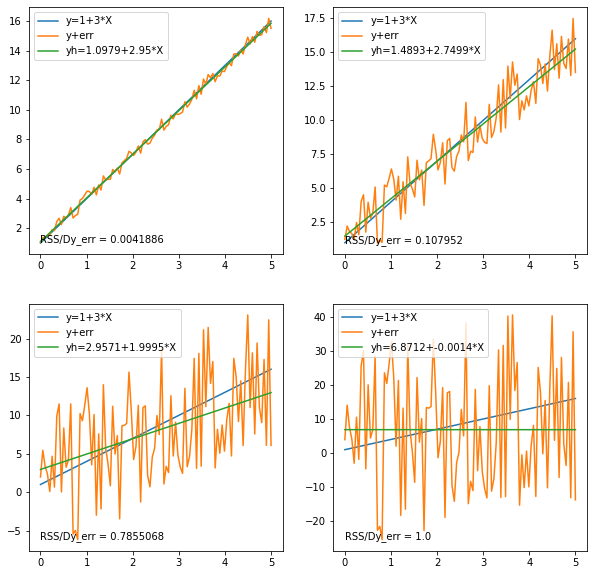

In [ ]:
import matplotlib.pyplot as plt
import scipy as sc
from numpy import linalg as alg

rng = sc.random.RandomState(0)

n = 100
err = rng.rand(n) - 0.5

X = sc.linspace(0, 5, n)
A = sc.zeros((n,2))
A[:, 0], A[:, 1]  = 1, X

k_errors = [1, 5, 20, 60] # размах ошибок (помехи)

b = [1, 3] # коэффициенты линейной зависимисти y(x)
# уравнение линии без помех
y = sc.array(b[0] + b[1] * X).reshape((n,1))

plt.figure(figsize=(10,10))

RSS_on_Dy_err_s = [] # массив коэффициентов RSS/Dy_err
for (i, kerr) in enumerate(k_errors):
    # добавляем случайную ошибку (помеху)
    y_err = sc.array( b[0] + b[1] * X + kerr*err).reshape((n,1))
    # предсказываем коэфф. для линии с помехой
    bh = alg.inv(sc.dot(A.T, A)).dot(A.T).dot(y_err).round(4)
    # значения предсказанной линии 
    yh = sc.array(bh[0] + bh[1] * X).reshape((n,1))
    # RSS/Dy_err
    RSS = ((y_err-yh)**2).sum()
    Dy_err = ((y_err - y_err.mean())**2).sum()
    RSS_on_Dy_err = sc.round_(RSS/Dy_err, 7)
    RSS_on_Dy_err_s.append(RSS_on_Dy_err)
    # рисуем
    plt.subplot(2, 2, i+1)  
    plt.plot(X, y, label='y={}+{}*X'.format(b[0], b[1]))
    plt.plot(X, y_err, label='y+err')
    plt.plot(X, yh, label='yh={}+{}*X'.format(bh[0][0], bh[1][0]))
    plt.legend()
    plt.text(0, y_err.min(), "RSS/Dy_err = {}".format(RSS_on_Dy_err))

#### Задача №1

Построим линейную регрессионную модель зависимости цены автомобиля Logan, года выпуска, пробега (км) и типа коробки передач.

Модель:

$price = \beta_0 + \beta_1year + \beta_2 mileage + \beta_3 z + \varepsilon$

$z$ - фиктивная переменная, принимающая значение 0, если коробка передач автоматическая, значение 1, если механическая.

Найдите  с помощью метода наименьших квадратов оценку параметра $\beta_1$

Найдите диагональный элемент матрицы $(A^TA)^{-1}$ , участвующий в построении доверительного интервала для параметра $\beta_1$

Найдите точность 95% доверительного интервала для $\beta_2$

Найдите коэффициент детерминации и проверьте значимость модели. Уровень значимости 0.05

Найдите значение стандартизованного остатка, соответствующего  2му наблюдению

Найдите  с помощью метода наименьших квадратов оценку параметра $\beta_1$

In [ ]:
df = pd.read_csv('car_regr.txt', sep='\t')
df.head(16)

,price,year,mileage,auto
0,250,2010,67.0,MT
1,365,2013,59.0,MT
2,365,2013,59.0,MT
3,250,2009,95.0,MT
4,310,2011,76.5,MT
5,125,2007,203.0,MT
6,150,2006,146.0,MT
7,225,2008,83.0,MT
8,269,2013,71.0,MT
9,250,2010,175.0,MT


In [ ]:
# 1 способ
dict_auto = {'MT': 1, 'AT': 0}
list(map(lambda x: dict_auto[x], df.auto))

In [ ]:
# 2 способ
dict_auto = {'MT': 1, 'AT': 0}
[dict_auto[x] for x in df.auto]

In [ ]:
# 3 способ
f = lambda x: 1 if x == 'MT' else 0
list(map(f, df.auto))

In [ ]:
dict_auto = {'MT': 1, 'AT': 0}
df.auto = [dict_auto[x] for x in df.auto]

In [ ]:
y = df.price.values.reshape(-1, 1)

n = df.price.count()
columbs = ['year', 'mileage', 'auto']
A = np.hstack((np.ones(n).reshape(-1, 1), df[columbs].values))

В LinearRegression можно не добавлять единицы в первый столбец.

In [ ]:
y = df.price.values.reshape(-1, 1)
columbs = ['year', 'mileage', 'auto']
A = df[columbs].values

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(y=y, X=A)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Найдите  с помощью метода наименьших квадратов оценку параметра $\beta_1$

In [ ]:
lr.coef_

array([[  20.48836148,   -0.13139714, -103.58272344]])

Найдите диагональный элемент матрицы $(A^TA)^{-1}$ , участвующий в построении доверительного интервала для параметра $\beta_1$

In [ ]:
n = df.price.count()
columbs = ['year', 'mileage', 'auto']
A = np.hstack((np.ones(n).reshape(-1, 1), df[columbs].values))

$[(A^TA)^{-1}]_{(j+1)(j+1)}$ такая запись, говорит нам, что необходимо взять из $(j+1)$ строки и $(j+1)$ столбца элемент из матрицы.

В нашем случае $j=1$, значит нам нужно взять из $1+1$ строки и $1+1$ столбца элемент матрицы.

In [ ]:
AA_inved = np.linalg.inv(A.T @ A)
AA_inved[1][1]

0.0069295349027427506

Найдите точность 95% доверительного интервала для $\beta_2$

Интервал будет такой

$\beta_2$

$\hat{\beta_2} \pm t_{1 - \frac{\alpha}{2}, n-k-1} S \sqrt{[(A^TA)^{-1}]_{(2+1)(2+1)}}$

А точность интервала это

$t_{1 - \frac{\alpha}{2}, n-k-1} S \sqrt{[(A^TA)^{-1}]_{(2+1)(2+1)}}$

$RSS = \sum \limits_{i=1}^n (y_i - \hat{y_i})^2$

$S^2 = \frac{RSS}{n-k-1} = \frac{ \sum \limits_{i=1}^n (y_i - \hat{y_i})^2}{n-k-1} = \frac{1}{\hat{\varepsilon}^T \hat{\varepsilon}} \sim \sigma^2$, где

$k$ - кол-во факторов, без учёта столбца с единицами.

$n-k-1$ т.к. у нас $k-1$ неизвестных факторов (иксов).

Тонкий момент, в данном случае нам нужно для вычисления элемента $[(A^TA)^{-1}]_{(2+1)(2+1)}$ использовать матрицу $A$, где первым столбцом будет столбец из единиц. Поэтому нужно будет перетренировать с такой же матрицей линейный регрессор.

In [ ]:
y = df.price.values.reshape(-1, 1)

y_pred = lr.predict(A)


In [ ]:
# наблюдаемые значения, отклики
y = df.price.values.reshape(-1, 1)

# матрица факторов с первм столбцом из единиц
n = df.price.count()
columbs = ['year', 'mileage', 'auto']
A = np.hstack((np.ones(n).reshape(-1, 1), df[columbs].values))

# модель
lr = LinearRegression()
lr.fit(y=y, X=A)

# предсказания
y_pred = lr.predict(A)

# k - кол-во факторов, без учёта столбца с единицами
k = A.shape[-1] - 1

RSS = np.sum((y - y_pred)**2)
# оценка дисперсии
S_square = RSS / (n - k - 1)
# оценка среднеквадратичного отклонения
S = np.sqrt(S_square)

In [ ]:
# квантиль
alpha = 0.05
t = st.t.ppf(1 - (alpha/2), df=(n-k-1))

In [ ]:
AA_inved = np.linalg.inv(A.T @ A)

accuracy = t * S * np.sqrt(AA_inved[2][2])
accuracy

0.4725279289738089

Найдите коэффициент детерминации и проверьте значимость модели. Уровень значимости 0.05

$H_0: \beta_{k_1} = ... = \beta_{k_q} = 0, k_i \neq 0$

$H_1: \exists \beta_{k_i} \neq 0$

Статистический критерий

$F = \frac{R^2}{1 - R^2} \frac{n-k-1}{k} \sim F_{k, n-k-1}$, где

$F_{k, n-k-1}$ распределение Фишера.

Коэффициент детерминации

$R^2 = K^2_{\hat{y}y} = \frac{ \bigg ( \sum \limits_{i=1}^n (y_i - \overline Y)(\hat{y_i} - \overline Y) \bigg )^2 }{\sum \limits_{i=1}^n (y_i - \overline Y)^2 \sum \limits_{i=1}^n (\hat{y_i} - \overline Y)^2} = 1 - \frac{RSS}{\sum \limits_{i=1}^n(y_i - \overline Y)^2}$

$V_k = (F_{1 - \alpha, k, n-k-1}, + \infty)$

$F_{1 - \alpha, k, n-k-1}$ квантиль фишера

In [ ]:
# коэффициент детерминации
R_square = 1 - (RSS / np.sum( (y - y.mean())**2 ) )
R_square

0.7456943477859415

In [ ]:
Fv = (R_square / (1 - R_square)) * ((n-k-1) / k )
Fv

39.0970126587808

In [ ]:
alpha = 0.05
st.f.ppf(1 - alpha, k, n-k-1)

2.8387453980206443

$F_в = 39$

$V_K = (2.8, + \infty)$

$F_в \in V_k \Rightarrow H_0$ отклоняем. Считаем, что наша модель значима!

Найдите значение стандартизованного остатка, соответствующего  2му наблюдению

$d_i = \frac{e_i}{S \sqrt{1 - h_{ii}}}$

$h_{ii} = [A(A^TA)^{-1}A^T]_{ii}$, 

$h_{ii}$ диагональный $i$-й элемент, матрицы $[A(A^TA)^{-1}A^T]$

$e_i = y_i - \hat{y_i}$

$S^2 = \frac{RSS}{n-k-1}$

$RSS = \sum \limits_{i=1}^n (y_i - \hat{y_i})^2$

$S = \sqrt{S^2}$



In [ ]:
# наблюдаемые значения, отклики
y = df.price.values.reshape(-1, 1)

# матрица факторов с первм столбцом из единиц
n = df.price.count()
columbs = ['year', 'mileage', 'auto']
A = np.hstack((np.ones(n).reshape(-1, 1), df[columbs].values))

# модель
lr = LinearRegression()
lr.fit(y=y, X=A)

# предсказания
y_pred = lr.predict(A)

# k - кол-во факторов, без учёта столбца с единицами
k = A.shape[-1] - 1

RSS = np.sum((y - y_pred)**2)
# оценка дисперсии
S_square = RSS / (n - k - 1)
# оценка среднеквадратичного отклонения
S = np.sqrt(S_square)

In [ ]:
y_2 = df.price.values[1].reshape(-1, 1)
X_2 = A[1].reshape(1, -1)

y_pred_2 = lr.predict(X_2)

e_2 = y_2 - y_pred_2

AA_inved = np.linalg.inv(A.T @ A)

h_2 = (A @ AA_inved @ A.T)[1][1]

d_2 = e_2 / (S * np.sqrt(1 - h_2))

d_2

array([[1.23736351]])

**Ответ:**

$\beta_1 = 20.49$

Найдите диагональный элемент матрицы $(A^TA)^{-1}$ , участвующий в построении доверительного интервала для параметра $\beta_1$

Этот элемент равен 0.07

точность интервала $t_{1 - \frac{\alpha}{2}, n-k-1} S \sqrt{[(A^TA)^{-1}]_{(2+1)(2+1)}} = 0.47$

$F_в = 39$

$H_0$ отклоняем, модель значима!

$h_2 = 1.24$

#### Задача №2

По наблюдениям

1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0 

4.7, 8.9, 6.2, 7.8, 8.1, 11.7, 7.2, 15.8, 1.1, 6.8, 9.1, 4.6, 21.5, 7.6, 6.2, 13.6, 30.1, 25.5, -0.1

была построена выборочная линейная регрессия $\hat{y} = 4.66 + 1.03 x$ 

Какие из основных предположений  об ошибках наблюдений нарушены?
Воспользуйтесь графическим анализом, чтобы ответить на поставленный вопрос

Остатки

$e_i = y_i - \hat{y}(x_i)$

$RSS = \sum \limits_{i=1}^n e^2_i = \sum \limits_{i=1}^n (y_i - \hat{y}(x_i))^2$

$S^2 = \frac{RSS}{n-2}$

$d_i = \frac{e_i}{S}$

In [ ]:
X = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0])
Y = np.array([4.7, 8.9, 6.2, 7.8, 8.1, 11.7, 7.2, 15.8, 1.1, 6.8, 9.1, 4.6, 21.5, 7.6, 6.2, 13.6, 30.1, 25.5, -0.1])

In [ ]:
from statsmodels.graphics.gofplots import qqplot

linreg = lambda x: 4.66 + 1.03 * x

y_pred = list(map(linreg, X))

ei = Y - y_pred

RSS = np.sum(ei**2)

n = len(X)
S_square = RSS / (n-2)
S = np.sqrt(S_square)

di = ei / S

График наблюдений (точки) и построенной линейной регрессии (оранжевая линия).

Видим, что у нас нет линейной зависимости $x$ от $y$, т.к. с увеличением $x$ $y$ ведет себя по разному. Отсюда можно сделать вывод, что взята не верная спецификация модели.

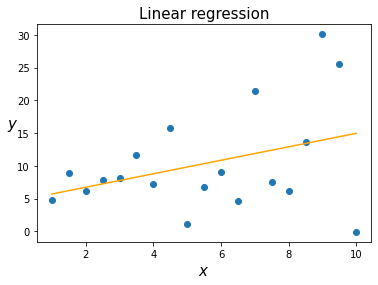

In [ ]:
plt.xlabel('$x$', fontsize = 15)
plt.ylabel('$y$', fontsize = 15, rotation = 0)

plt.title('Linear regression', fontsize = 15)

plt.scatter(X, Y)
plt.plot(X, y_pred, color = 'orange');

График зависимости остатков стандартизированных остатков $d_i$ от оцененных значений $\hat{y}$.

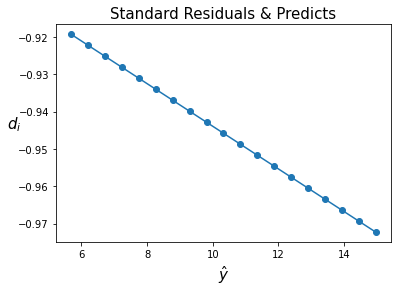

In [ ]:
plt.xlabel('$\hat{y}$', fontsize = 15)
plt.ylabel('$d_i$', fontsize = 15, rotation = 0)

plt.title('Standard Residuals & Predicts', fontsize = 15)

plt.plot(y_pred, di, '-o');

График зависимости остатков стандартизированных остатков $d_i$ от значений факторов $x_{ij}$

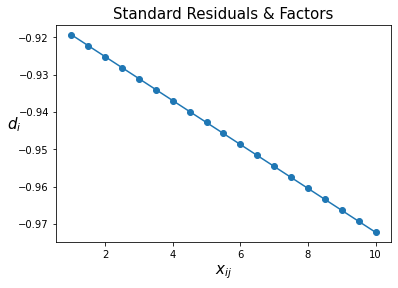

In [ ]:
plt.xlabel('$x_{ij}$', fontsize = 15)
plt.ylabel('$d_i$', fontsize = 15, rotation = 0)

plt.title('Standard Residuals & Factors', fontsize = 15)

plt.plot(X, di, '-o');

График зависимости $e_i = y - \hat{y}$ от номера наблюдения.

Для проверки дисперсии ошибок наблюдений.

Из графика видно, что с увеличением номера наблюдения, растёт и дисперсия ошибок наблюдений. Значит есть зависимость между номерами наблюдения и дисперсией ошибок наблюдения.

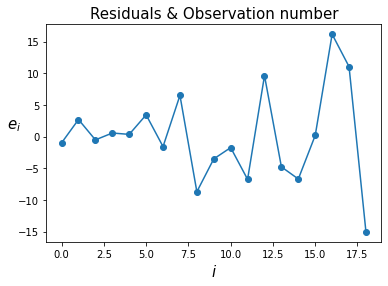

In [ ]:
plt.xlabel('$i$', fontsize = 15)
plt.ylabel('$e_i$', fontsize = 15, rotation = 0)

plt.title('Residuals & Observation number', fontsize = 15)
plt.plot(ei, '-o');

Построим график квантиль квантиль QQ, чтобы проверить нормальность распределения остатков наблюдения

По графику види, что больших отлонений от прямой линии нет, значит наши остатки имеют нормально распределение.

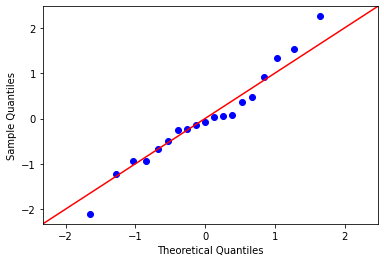

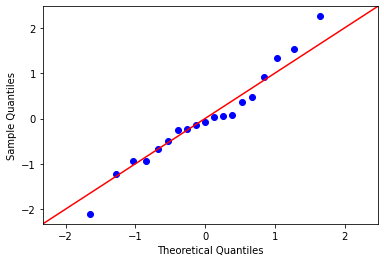

In [ ]:
qqplot(di, line='45', fit=True)

Проведем тест на нормальность распределения остатков Шапиро

Остатки обозначим сл. вел. $\xi$.

Проверим гипотезу

$H_0: \xi \sim N(a, \sigma)$

$H_1: \xi \neq N(a, \sigma)$

$p_{value} < \alpha \Rightarrow H_0$ отклоняется.

Возьмем уровень значимости $\alpha = 0.05$

In [ ]:
st.shapiro(ei)

ShapiroResult(statistic=0.9758793711662292, pvalue=0.8846269249916077)

$p_{value} = 0.88$

$p_{value} > \alpha \Rightarrow H_0$ не отклоняется. Значит остатки имеют нормально распределение.